Notebook for cleaning data for the imdb data set

In [1]:
# load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load data
name_basics = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\name_basics.csv")
title_akas = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_akas.csv")
title_basics = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_basics.csv")

In [3]:
#check data types to make sure they're in the correct format for analysis
name_basics.dtypes


nconst                 object
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
known_for_titles       object
dtype: object

In [4]:
title_akas.dtypes


title_id              object
ordering               int64
title                 object
region                object
language              object
types                 object
attributes            object
is_original_title    float64
dtype: object

In [5]:
title_basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

From these data sets, we are most interested in the tart year and run time values which are in float64 data type 
which allows for quantitative analysis. Next we'll take a look at what our data sets look like in general. 

In [20]:
# get a better idea of what the data looks like using .head()

#title_basics.head()
#title_akas.head()
#name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


It appears there are missing values under NaN but just how many ? Below we will see how man values in each column for each data set. 

In [10]:
#title_basics.isnull().sum()
#title_akas.isnull().sum()
#name_basics.isnull().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [ ]:
So there looks to be a lot of NaN or missing values but values with a NaN value are ignored from operations like sum, count, etc.
so for gaining insights using viusalizations or summary statistics we can leave them as they will not be counted. 

In [24]:
#using the .describe() method
title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [ ]:
# to look for outliers in the 'run time in minutes' and ' start year' lets looks at a boxplot 

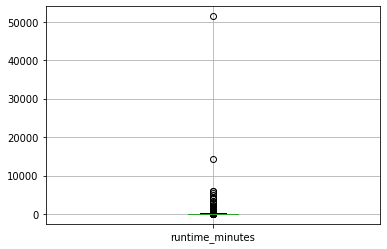

In [21]:
title_basics.boxplot(column = ['runtime_minutes'])

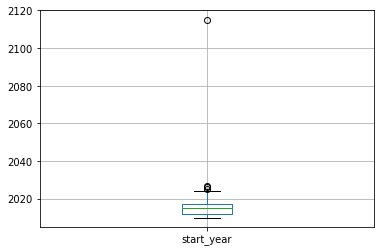

In [18]:
title_basics.boxplot(column = ['start_year'])

From visual and quantitative inspection it appears that both of these columns have outliers as marked by the individual dots in the boxplots showing some unrealistic values for both run time and sart year. hint: it is 2020 currently. So lets adjust these data set values to a more reasonable range and then inspect the distribution again. 

In [34]:
indextime = title_basics[title_basics['runtime_minutes'] >= 200].index

In [35]:
title_basics.drop(indextime , inplace=True)

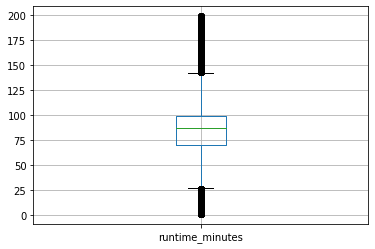

In [36]:
title_basics.boxplot(column = ['runtime_minutes'])

In [37]:
indexyear = title_basics[title_basics['start_year'] >= 2020].index

In [38]:
title_basics.drop(indexyear , inplace=True)

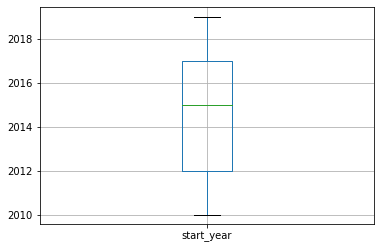

In [39]:
title_basics.boxplot(column = ['start_year'])

C:\Users\rafav\Documents\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rafav\Documents\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


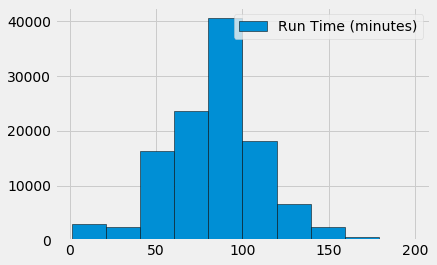

In [47]:
plt.style.use('fivethirtyeight')
plt.hist(title_basics['runtime_minutes'], edgecolor = 'black', label = 'Run Time (minutes)')
plt.legend()

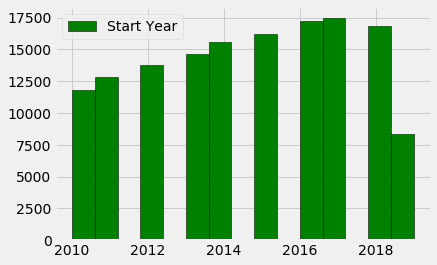

In [48]:
plt.style.use('fivethirtyeight')
plt.hist(title_basics['start_year'], color = 'green', edgecolor = 'black', label = 'Start Year' , bins = 15)
plt.legend()